In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Text(0, 0.5, 'Percent Signal Change')

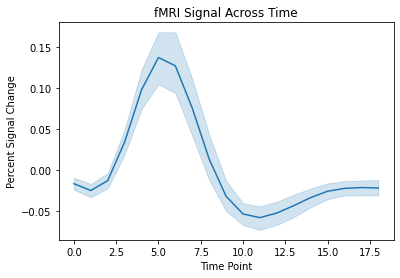

In [5]:
sns.lineplot(data=fmri, x="timepoint", y="signal")

plt.title("fMRI Signal Across Time")
plt.xlabel("Time Point")
plt.ylabel("Percent Signal Change")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

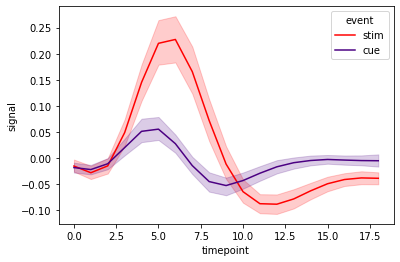

In [8]:
sns.lineplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="event",
    palette=["red", "indigo"]
)

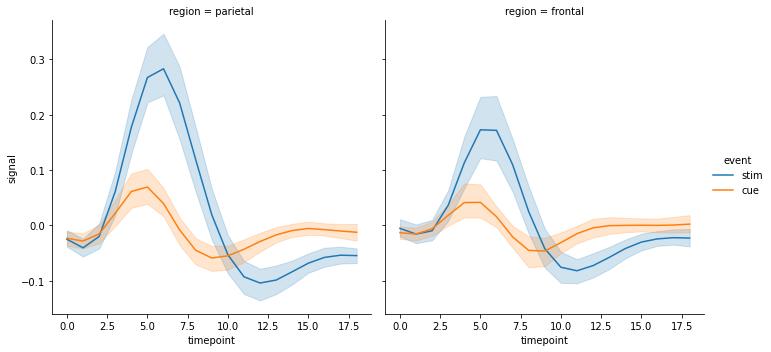

In [9]:
sns.relplot(
    data=fmri,
    x="timepoint",
    y="signal",
    hue="event",
    col="region",
    kind="line"
)

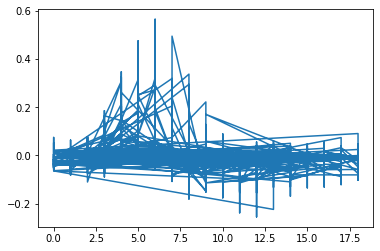

In [10]:
plt.plot(fmri["timepoint"], fmri["signal"])

In [11]:
data = fmri[["timepoint", "signal"]].groupby("timepoint").mean()
data.head()

,signal
timepoint,
0,-0.016662
1,-0.025002
2,-0.012873
3,0.034446
4,0.098194


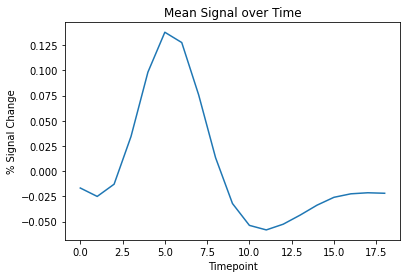

In [13]:
plt.plot(data)
plt.title("Mean Signal over Time")
plt.xlabel("Timepoint")
plt.ylabel("% Signal Change")
plt.show()

In [14]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
mean_day = tips[["total_bill", "day"]].groupby("day").mean()
mean_day

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


<BarContainer object of 4 artists>

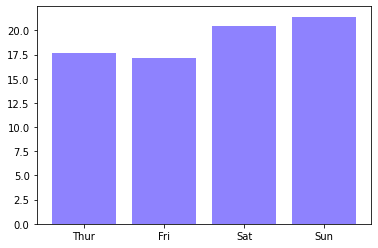

In [17]:
plt.bar(mean_day.index, mean_day["total_bill"], color="xkcd:periwinkle")

In [18]:
tips.groupby("day").mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


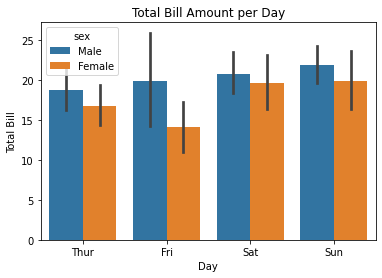

In [19]:
sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill Amount per Day")
plt.show()

In [20]:
tips["tip_pc"] = tips["tip"] / tips["total_bill"]

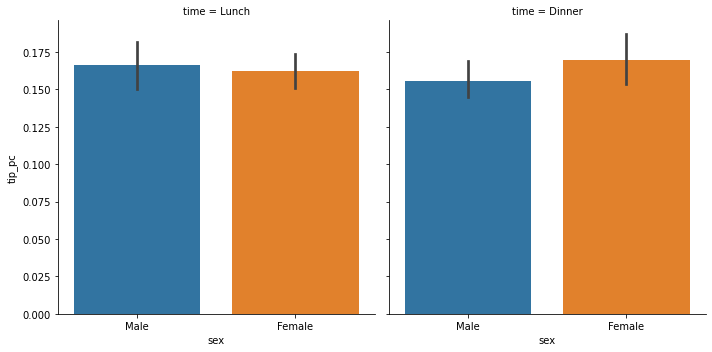

In [21]:
sns.catplot(
    data=tips,
    x="sex",
    y="tip_pc",
    col="time",
    kind="bar"
)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

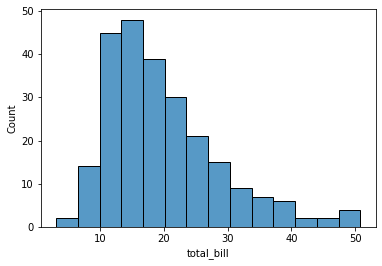

In [23]:
sns.histplot(tips["total_bill"])

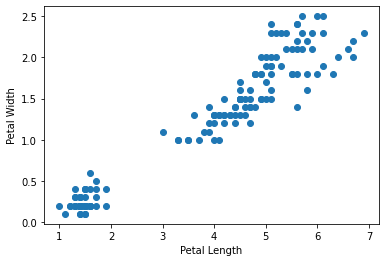

In [25]:
iris = sns.load_dataset('iris')
plt.scatter(iris["petal_length"], iris["petal_width"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

Text(0.5, 0.98, ' for Different Species of Iris')

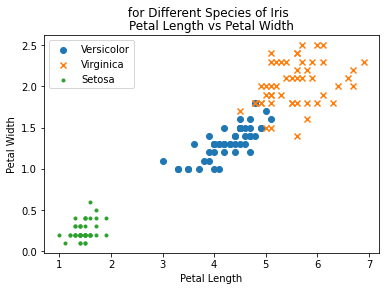

In [26]:
vers = iris[iris["species"] == "versicolor"]
virg = iris[iris["species"] == "virginica"]
seto = iris[iris["species"] == "setosa"]

plt.scatter(vers.petal_length, vers.petal_width, marker="o")
plt.scatter(virg.petal_length, virg.petal_width, marker="x")
plt.scatter(seto.petal_length, seto.petal_width, marker=".")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(labels=["Versicolor", "Virginica", "Setosa"])
plt.title("Petal Length vs Petal Width")
plt.suptitle(" for Different Species of Iris")

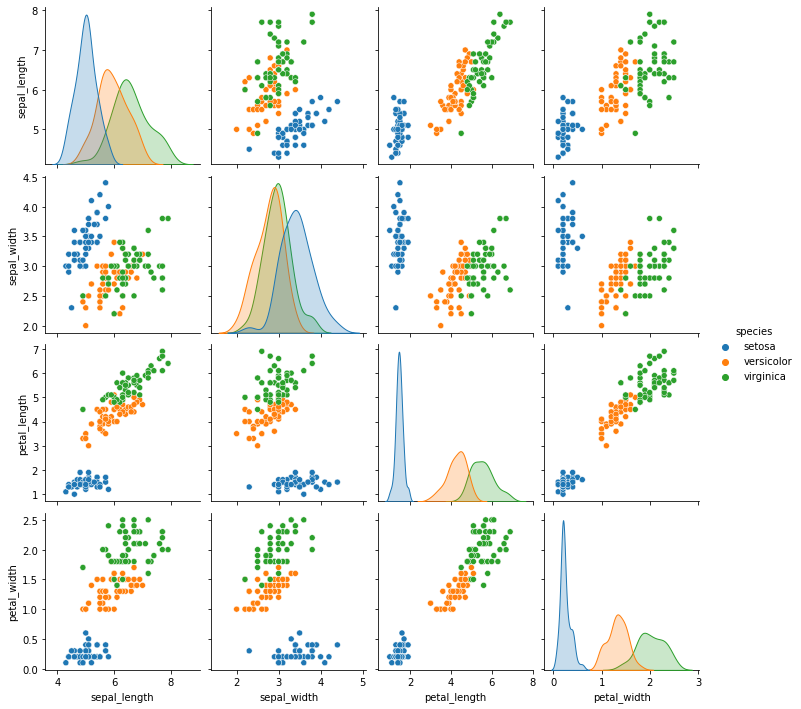

In [27]:
sns.pairplot(iris, hue="species")

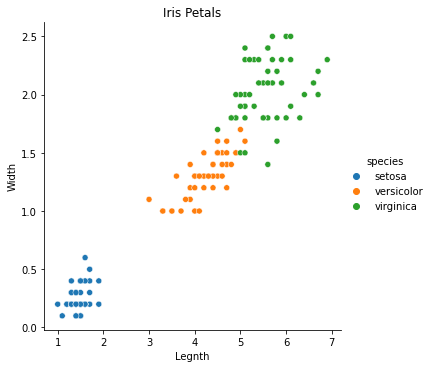

In [31]:
sns.relplot(
    data=iris,
    x="petal_length",
    y="petal_width",
    hue="species"
).set(
    title="Iris Petals",
    xlabel="Legnth",
    ylabel="Width"
)

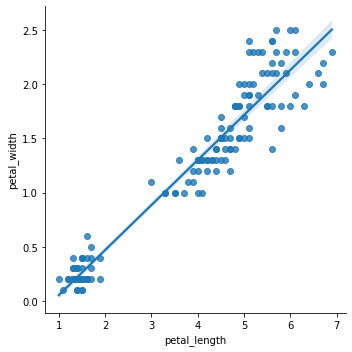

In [32]:
sns.lmplot(data=iris, x="petal_length", y="petal_width", hue="species")

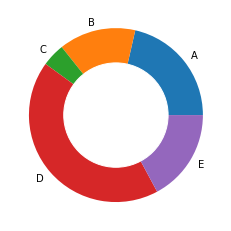

In [36]:
counts = [15, 10, 3, 30, 12]
plt.pie(counts, labels=["A", "B", "C", "D", "E"])
circle = plt.Circle((0,0), 0.6, color="white")
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.show()

In [37]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
boarded = titanic.groupby("class").pclass.count()
boarded

class
First     216
Second    184
Third     491
Name: pclass, dtype: int64

In [39]:
import squarify

(0.0, 100.0, 0.0, 100.0)

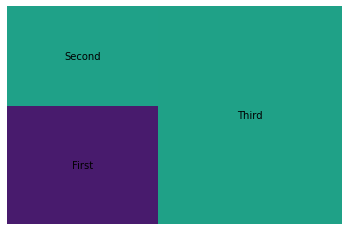

In [42]:
squarify.plot(boarded, label=boarded.index)
plt.axis("off")

<AxesSubplot:>

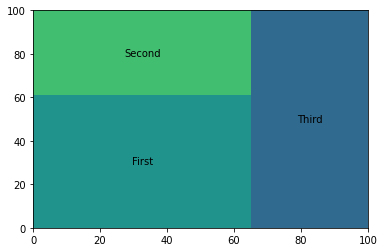

In [46]:
c = ["xkcd:blue", "xkcd:pink", "xkcd:brown"]
survived = titanic[titanic["alive"] == "yes"].groupby("class").pclass.count()
squarify.plot(survived, label=survived.index)